## Data visualization for ggplot2
Recreating this plot from [The Economist](http://www.economist.com/node/21541178)

Warning message:
"package 'IRdisplay' was built under R version 3.3.3"

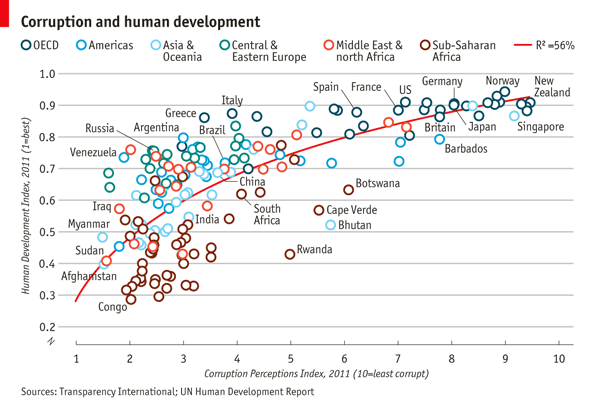

In [1]:
library("IRdisplay")
display_png(file="Economist1.png") 

In [2]:
library(ggplot2)
library(data.table)
df <- fread('Economist_Assignment_Data.csv',drop=1)
head(df)

Warning message:
"package 'ggplot2' was built under R version 3.3.3"

Country,HDI.Rank,HDI,CPI,Region
Afghanistan,172,0.398,1.5,Asia Pacific
Albania,70,0.739,3.1,East EU Cemt Asia
Algeria,96,0.698,2.9,MENA
Angola,148,0.486,2.0,SSA
Argentina,45,0.797,3.0,Americas
Armenia,86,0.716,2.6,East EU Cemt Asia


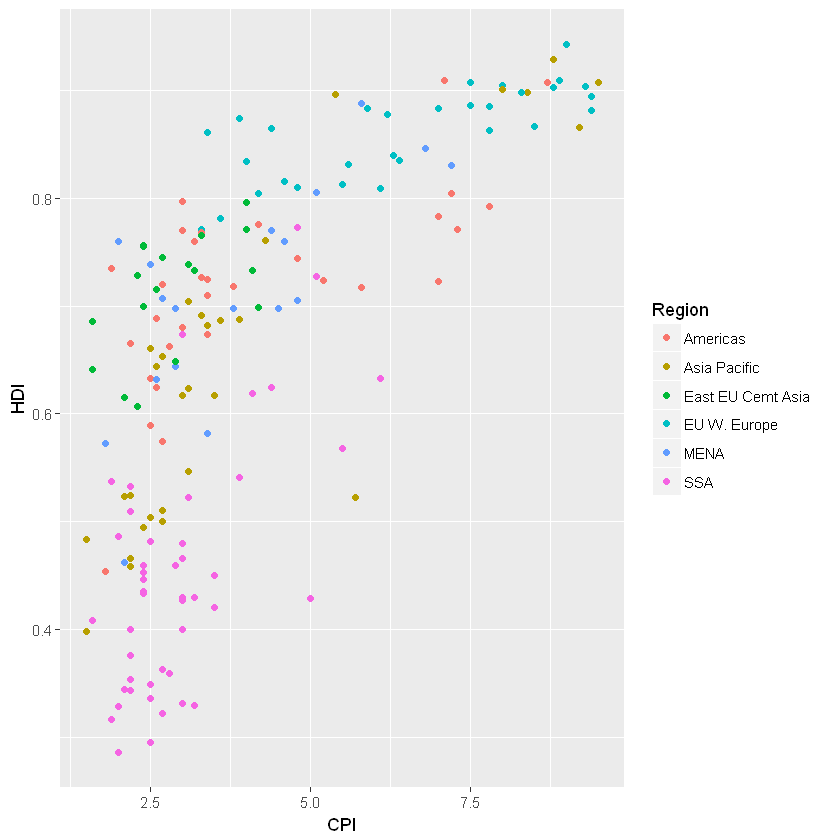

In [3]:
ggplot(df, aes(x=CPI, y=HDI, color=Region)) + geom_point()

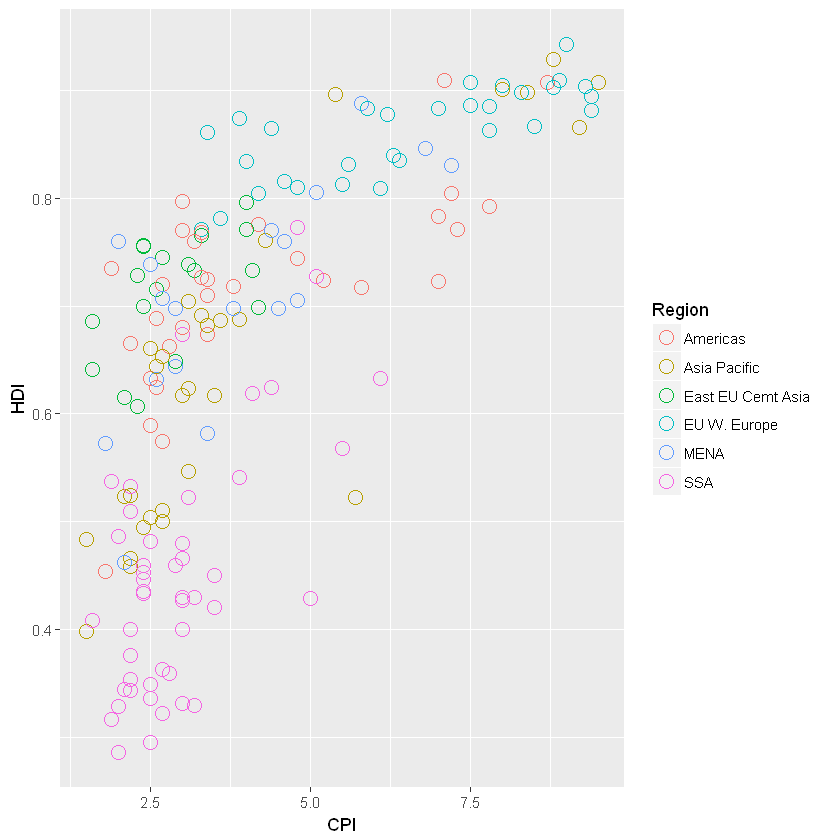

In [5]:
pl = ggplot(df, aes(x=CPI, y=HDI, color=Region)) + geom_point(size=4, shape=1)
pl

`geom_smooth()` using method = 'loess'


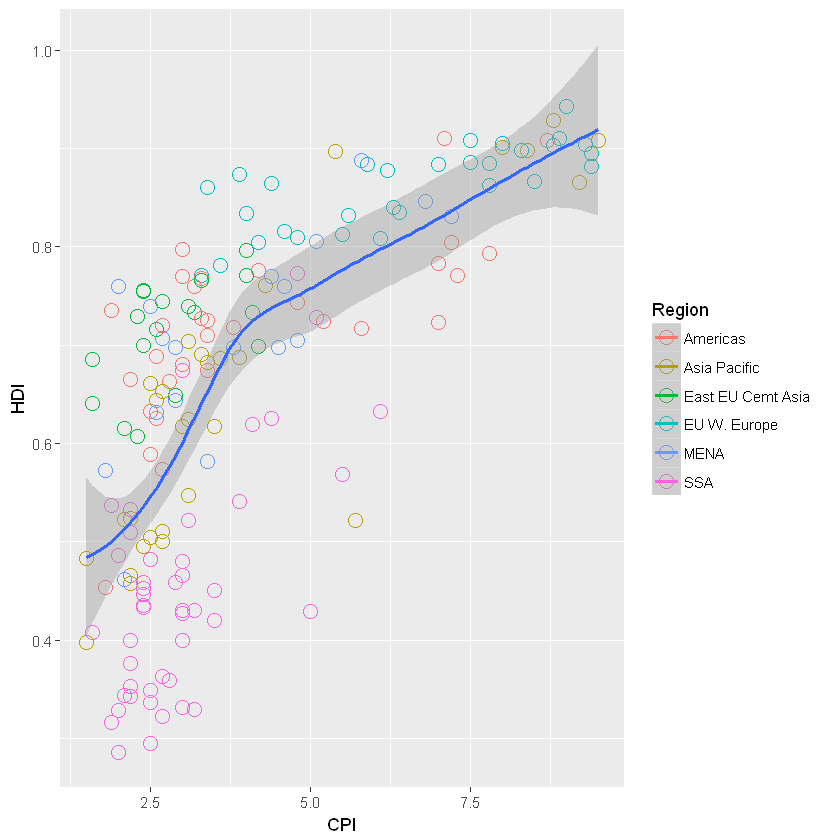

In [9]:
pl + geom_smooth(aes(group=1))

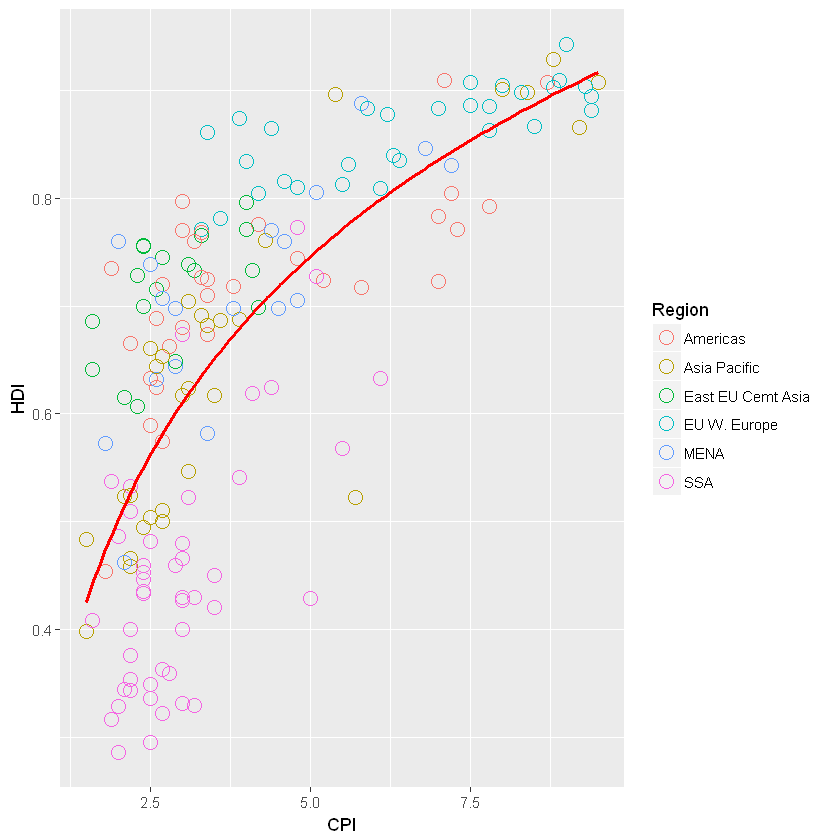

In [10]:
pl2 <- pl + geom_smooth(aes(group=1),method ='lm',formula = y~log(x),se=FALSE,color='red')
pl2

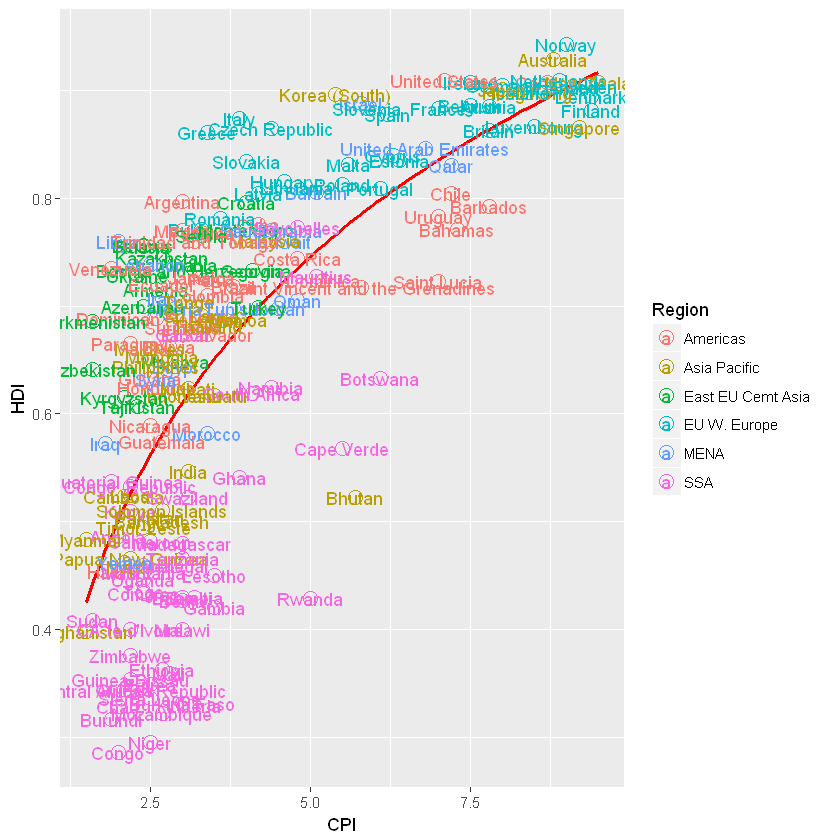

In [11]:
pl2 + geom_text(aes(label=Country))

# Labeling a subset

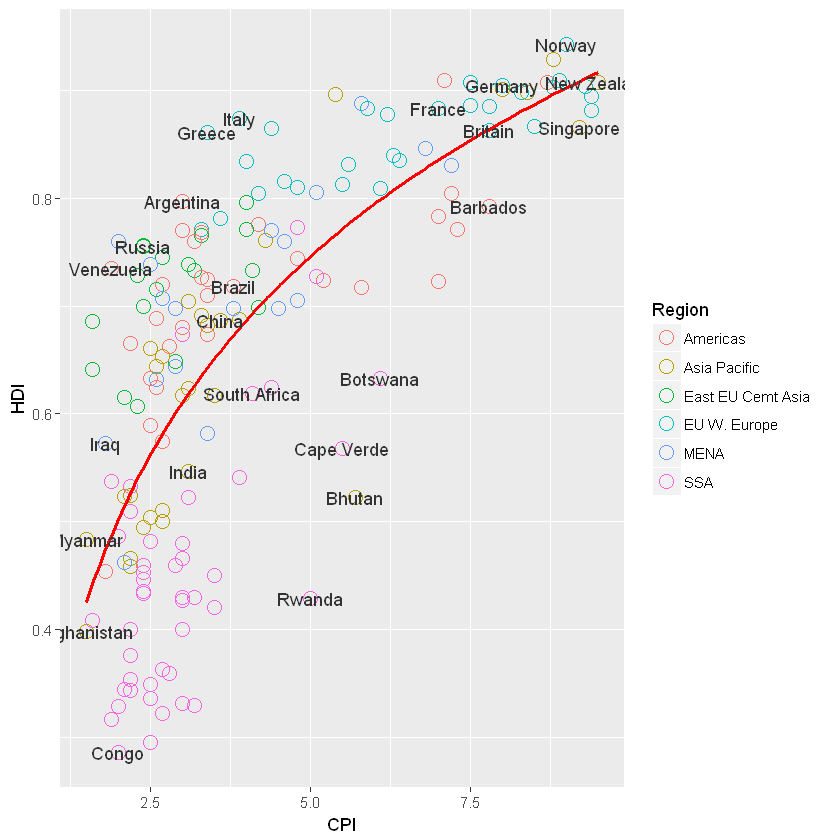

In [12]:
pointsToLabel <- c("Russia", "Venezuela", "Iraq", "Myanmar", "Sudan",
                   "Afghanistan", "Congo", "Greece", "Argentina", "Brazil",
                   "India", "Italy", "China", "South Africa", "Spane",
                   "Botswana", "Cape Verde", "Bhutan", "Rwanda", "France",
                   "United States", "Germany", "Britain", "Barbados", "Norway", "Japan",
                   "New Zealand", "Singapore")

pl3 <- pl2 + geom_text(aes(label = Country), color = "gray20", 
                data = subset(df, Country %in% pointsToLabel),check_overlap = TRUE)

pl3

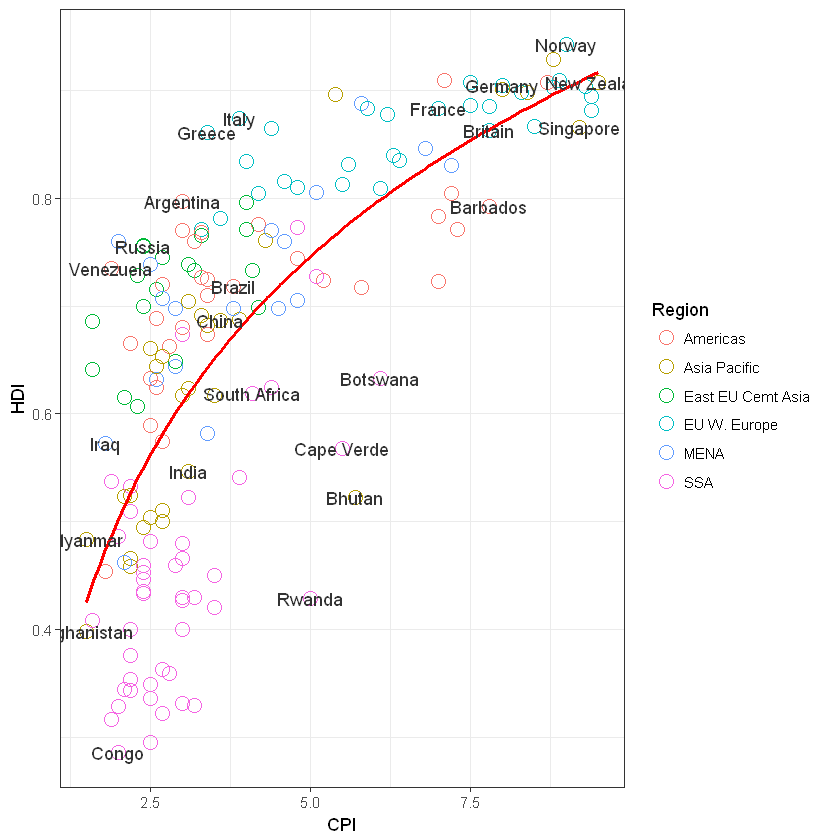

In [13]:
pl4 <- pl3 + theme_bw() 
pl4

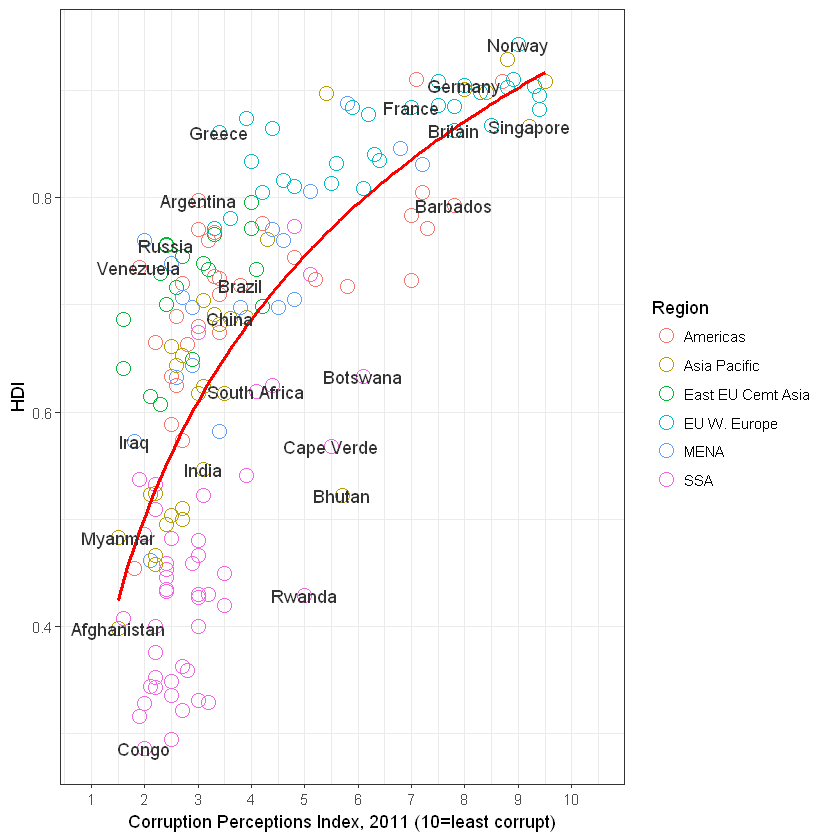

In [14]:
pl5 <- pl4 + scale_x_continuous(name = "Corruption Perceptions Index, 2011 (10=least corrupt)",
                     limits = c(.9, 10.5),breaks=1:10) 
pl5

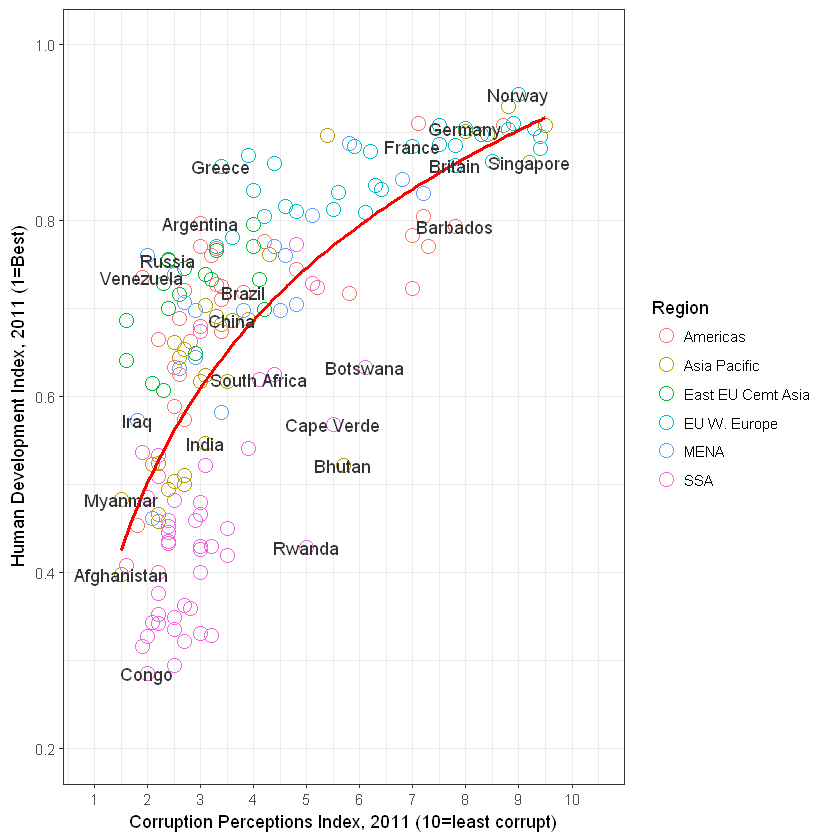

In [15]:
pl6 <- pl5 + scale_y_continuous(name = "Human Development Index, 2011 (1=Best)",
                     limits = c(0.2, 1.0))
pl6

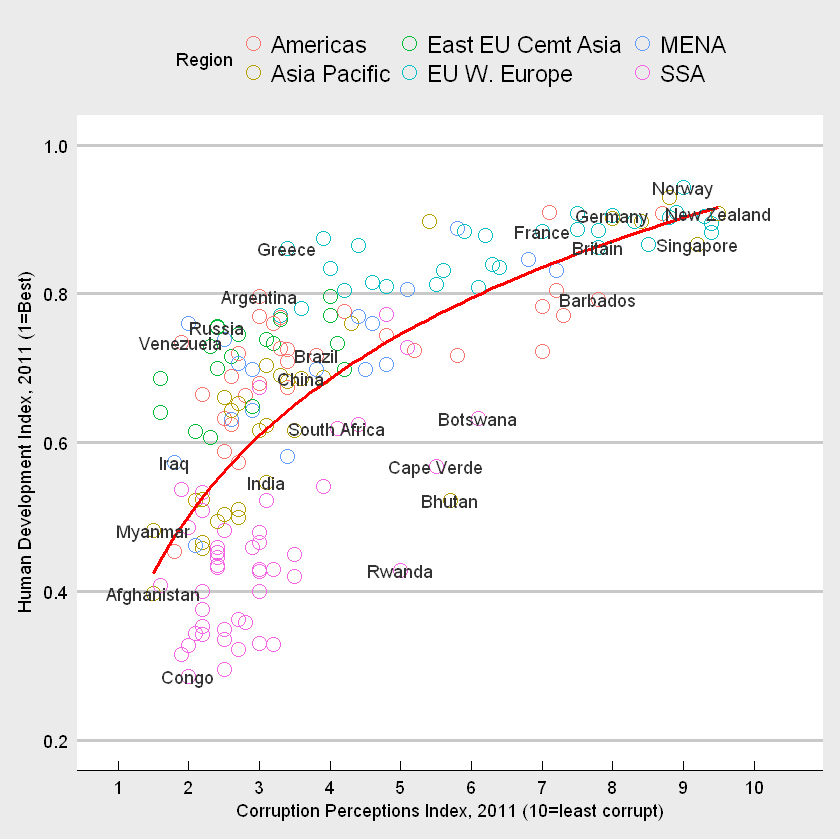

In [16]:
library(ggthemes)
pl6 + theme_economist_white()